# OTIMIZACAO DE HIPERPARÂMETROS

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz


In [2]:
SEED = 85746

In [3]:
#Importando dados
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

In [4]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]

In [5]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print(f"Accuracia média {media.round(2)}")
  print(f"Intervalo {(round(media - 2 * desvio,2), round(media + 2 * desvio,2))}")

------------------------------
Acurácia com Decision Tree Classifier (73.83 - 77.73)
------------------------------
DECISION TREE - Group KFold


Accuracia média 75.76
Intervalo (72.99, 78.54)
------------------------------
DecisionTreeClassifier(max_depth=2)


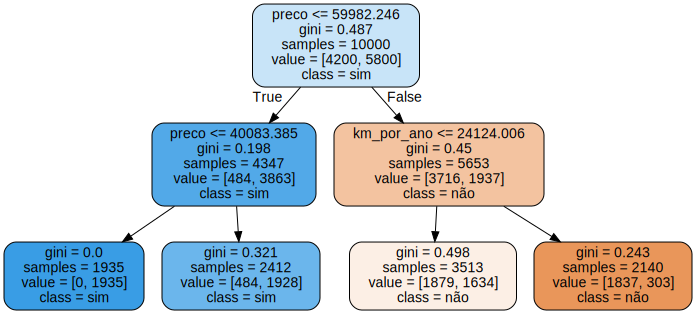

In [6]:
print('-'*30)
# Decision Tree Classifier
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
min = (media - 2 * desvio_padrao) * 100
max = (media + 2 * desvio_padrao) * 100
print(f"Acurácia com Decision Tree Classifier ({min.round(2)} - {max.round(2)})")

print('-'*30)

# GroupKFold para analisar como o modelo se comporta com novos grupos

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1


print('DECISION TREE - Group KFold')
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

print('-'*30)

print(modelo)

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

In [7]:
print('-'*30)
# Decision Tree Classifier
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
min = (media - 2 * desvio_padrao) * 100
max = (media + 2 * desvio_padrao) * 100
print(f"Acurácia com Decision Tree Classifier ({min.round(2)} - {max.round(2)})")

print('-'*30)

# GroupKFold para analisar como o modelo se comporta com novos grupos

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1


print('DECISION TREE - Group KFold')
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

print('-'*30)

print(modelo)

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)


------------------------------
Acurácia com Decision Tree Classifier (73.83 - 77.73)
------------------------------
DECISION TREE - Group KFold


Accuracia média 78.67
Intervalo (76.42, 80.93)
------------------------------
DecisionTreeClassifier(max_depth=3)


In [8]:
results

{'fit_time': array([0.00919366, 0.00963831, 0.01086044, 0.00996709, 0.01082587,
        0.00997043, 0.00953269, 0.00881147, 0.00893402, 0.00950384]),
 'score_time': array([0.00219488, 0.00269628, 0.0024159 , 0.00248003, 0.00232005,
        0.00239491, 0.00231028, 0.00233006, 0.00230813, 0.00259542]),
 'test_score': array([0.78650554, 0.812249  , 0.77777778, 0.77529183, 0.78411405,
        0.78635015, 0.79001019, 0.7715736 , 0.79919273, 0.78422053])}

## Testando parâmetros

In [9]:
def roda_arvore_de_decisao(max_depth):
    SEED = 5413
    np.random.seed(SEED)
    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.76


Arvore max_depth = 2, treino = 75.79, teste = 75.76
Arvore max_depth = 3, treino = 78.76, teste = 78.67
Arvore max_depth = 4, treino = 78.80, teste = 78.61
Arvore max_depth = 5, treino = 78.95, teste = 78.51
Arvore max_depth = 6, treino = 79.17, teste = 78.36
Arvore max_depth = 7, treino = 79.43, teste = 78.17
Arvore max_depth = 8, treino = 79.86, teste = 77.73
Arvore max_depth = 9, treino = 80.38, teste = 77.49
Arvore max_depth = 10, treino = 81.12, teste = 77.20
Arvore max_depth = 11, treino = 81.94, teste = 76.71
Arvore max_depth = 12, treino = 82.89, teste = 76.61
Arvore max_depth = 13, treino = 83.83, teste = 76.14
Arvore max_depth = 14, treino = 84.88, teste = 75.85
Arvore max_depth = 15, treino = 86.02, teste = 75.09
Arvore max_depth = 16, treino = 87.12, teste = 74.86
Arvore max_depth = 17, treino = 88.21, teste = 74.45
Arvore max_depth = 18, treino = 89.26, teste = 73.98
Arvore max_depth = 19, treino = 90.27, teste = 73.74
Arvore max_depth = 20, treino = 91.21, teste = 73.93
A

,max_depth,train,test
0,1,75.792288,75.764959
1,2,75.792288,75.764959
2,3,78.757806,78.672854
3,4,78.803358,78.611893
4,5,78.954435,78.513536


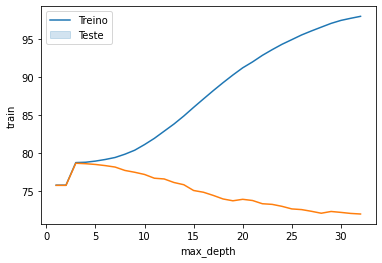

In [10]:
import matplotlib.pyplot as plt
import seaborn as  sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

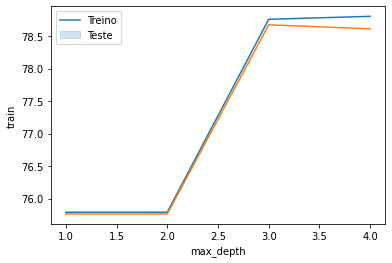

In [11]:
def roda_arvore_de_decisao(max_depth):
    SEED = 5413
    np.random.seed(SEED)
    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 5)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [12]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
  
    resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,32,75.792288,75.764959
1,1,64,75.792288,75.764959
2,1,128,75.792288,75.764959
3,1,256,75.792288,75.764959
4,2,32,75.792288,75.764959


In [13]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.550226,0.017028
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.411405,0.323743
train,5.502259e-01,-4.114051e-01,1.000000,0.217795
test,1.702811e-02,3.237434e-01,0.217795,1.000000


<AxesSubplot:>

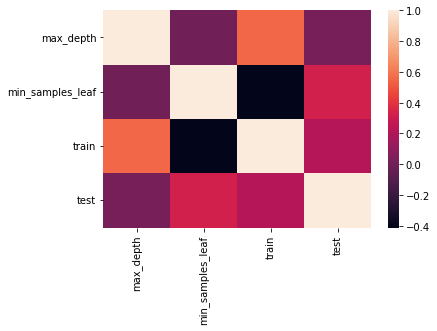

In [14]:
sns.heatmap(corr)

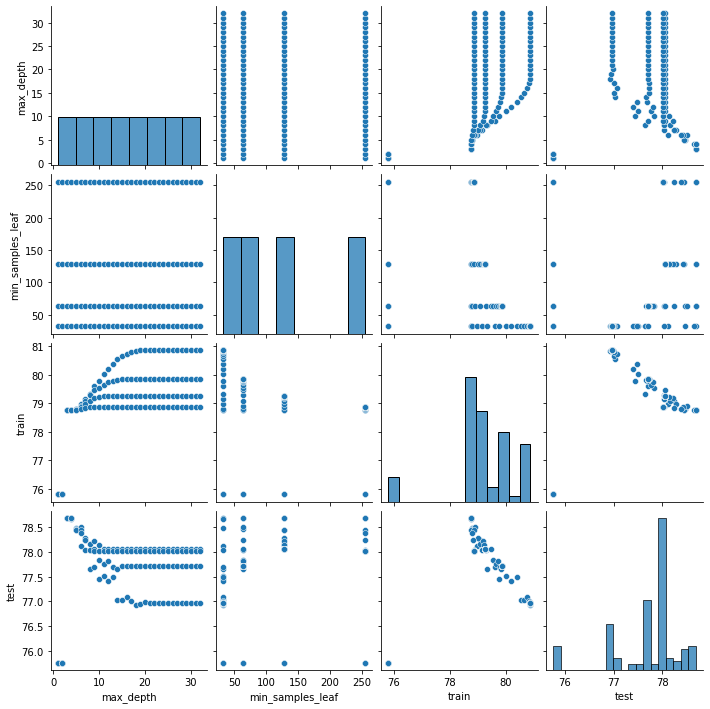

In [15]:
sns.pairplot(resultados)

<AxesSubplot:>

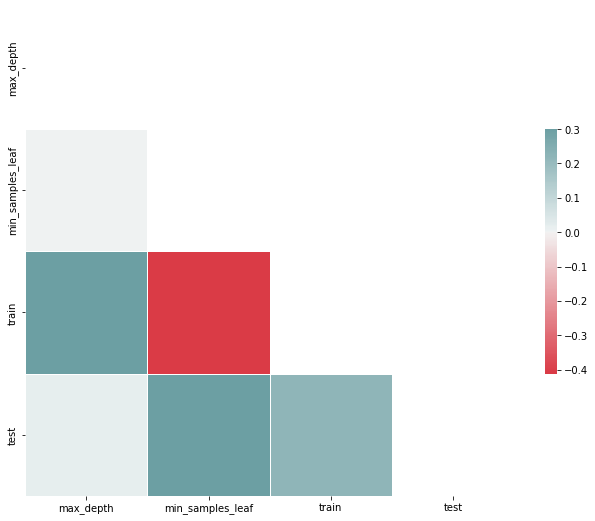

In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Explorando 3 dimensões de hiperparametros

In [17]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.792288,75.764959,0.006443,0.002790
1,1,32,64,75.792288,75.764959,0.005713,0.002367
2,1,32,128,75.792288,75.764959,0.005389,0.002502
3,1,32,256,75.792288,75.764959,0.004980,0.002300
4,1,64,32,75.792288,75.764959,0.005615,0.002334


# Explorando espaço de hiper parâmetros com GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV


SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009109,0.000422,0.002442,0.000339,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.786506,...,0.775292,0.785132,0.78635,0.79001,0.771574,0.799193,0.784221,0.78683,0.011256,1
1,0.008530,0.000419,0.002015,0.000310,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.786506,...,0.775292,0.785132,0.78635,0.79001,0.771574,0.799193,0.784221,0.78683,0.011256,1
2,0.008759,0.000429,0.002113,0.000268,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.786506,...,0.775292,0.785132,0.78635,0.79001,0.771574,0.799193,0.784221,0.78683,0.011256,1
3,0.009011,0.000614,0.002303,0.000427,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.786506,...,0.775292,0.785132,0.78635,0.79001,0.771574,0.799193,0.784221,0.78683,0.011256,1
4,0.008319,0.000271,0.001868,0.000200,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.786506,...,0.775292,0.785132,0.78635,0.79001,0.771574,0.799193,0.784221,0.78683,0.011256,1


In [19]:
print(busca.best_score_ * 100)
print(f'Melhor estimador: \n-->\t{busca.best_estimator_}')

78.68303737258626
Melhor estimador: 
-->	DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


In [20]:
from sklearn.metrics import accuracy_score 

predicoes = busca.best_estimator_.predict(x_azar) 
accuracy = accuracy_score(predicoes, y_azar) * 100

print("Accuracy para os dados foi %.2f%%" % accuracy)

# PORÉM, A ABORDAGEM É OTIMISTA :/

Accuracy para os dados foi 78.75%


## Como ter uma estimativa sem esse vício nos dados que eu já vi?

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [25]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [26]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [27]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

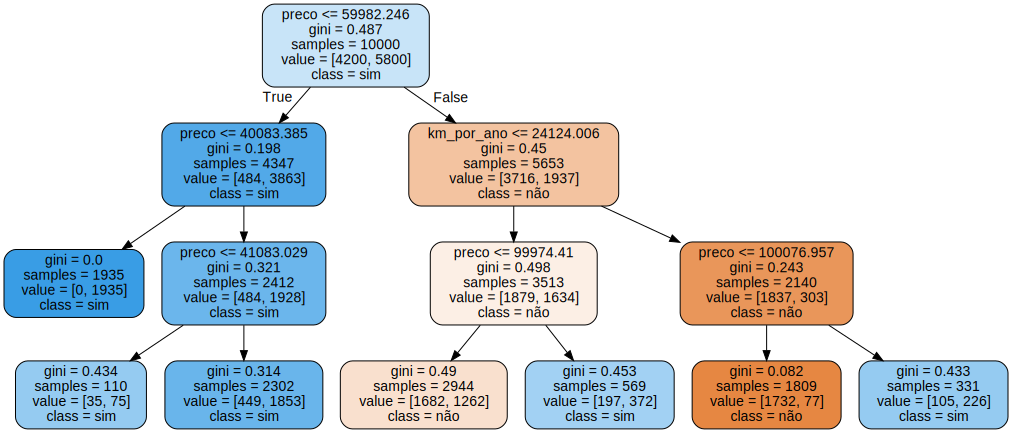

In [28]:
from sklearn.tree import export_graphviz
import graphviz


features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Parte 2: Otimização com exploração aleatória

## Random Search

In [29]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = KFold(n_splits = 5),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012835,0.001064,0.002775,0.000347,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.4330,0.4525,0.771,0.742,0.7725,0.6342,0.156817,1
1,0.008331,0.000206,0.002561,0.000270,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4015,0.4165,0.771,0.766,0.7725,0.6255,0.176848,11
2,0.008530,0.000356,0.002500,0.000352,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4015,0.4165,0.771,0.766,0.7725,0.6255,0.176848,11
3,0.014308,0.000372,0.002309,0.000127,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.750,0.7445,0.6286,0.155544,5
4,0.014101,0.000344,0.002219,0.000120,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.750,0.7445,0.6286,0.155544,5


In [30]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 78.41
Intervalo [76.12, 80.70]


In [31]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=5, min_samples_leaf=128, min_samples_split=128)

In [32]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 128,
                    cv = KFold(n_splits = 5, shuffle=True),
                          random_state = SEED)


busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.67
Intervalo [77.13, 80.21]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [33]:
# n_iter = 16
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 51, 'min_samples_split': 49}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 41, 'min_samples_split': 38}
0.787 +- (0.019) {'criterion': 'entropy', 'ma

In [34]:
# n_iter = 64
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 51, 'min_samples_split': 49}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 41, 'min_samples_split': 38}
0.787 +- (0.019) {'criterion': 'entropy', 'ma

In [35]:
# n_iter = 128
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 51, 'min_samples_split': 49}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 41, 'min_samples_split': 38}
0.787 +- (0.019) {'criterion': 'entropy', 'ma

## Comparando GridSearchCV X RandomizedSearchCV (1 comparação)

In [39]:
from sklearn.ensemble import RandomForestClassifier
import time 

In [ ]:


SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)

Tempo 190.98 segundos


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [ ]:
tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 20,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

Tempo 20.68 segundos


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


# Avaliar se eu não posso ou consigo usar o cross validation

In [44]:
from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 1.73 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.337747,0.0,0.021235,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7745,0.7745,0.0,2
1,0.294525,0.0,0.020227,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7735,0.7735,0.0,5
2,0.302393,0.0,0.021548,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2
3,0.204505,0.0,0.014128,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7750,0.7750,0.0,1
4,0.272781,0.0,0.018343,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2


In [54]:
SEED=301
np.random.seed(SEED)

tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

scores

Tempo 0.76 segundos


array([0.77])